In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Install CatBoost
!pip install catboost

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve, average_precision_score)

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Deep Learning
import warnings
warnings.filterwarnings('ignore')

# Visualization
import plotly.io as pio
pio.templates.default = "plotly_white"

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Project Repository/dementia_dataset.csv'
df = pd.read_csv(dataset_path)

print(f"✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

✅ Dataset loaded successfully!
Shape: (373, 15)

First few rows:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Basic Information
print("\n1. Dataset Information:")
print(df.info())

print("\n2. Statistical Summary:")
print(df.describe())

print("\n3. Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values(by='Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

print("\n4. Data Types:")
print(df.dtypes.value_counts())

print("\n5. Target Variable Distribution:")

target_col = 'Group'

print(df[target_col].value_counts())
print(f"\nClass Balance:\n{df[target_col].value_counts(normalize=True)*100}")

EXPLORATORY DATA ANALYSIS

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None

2. Statistical Summary:
            Visit     MR Delay         Age        EDUC

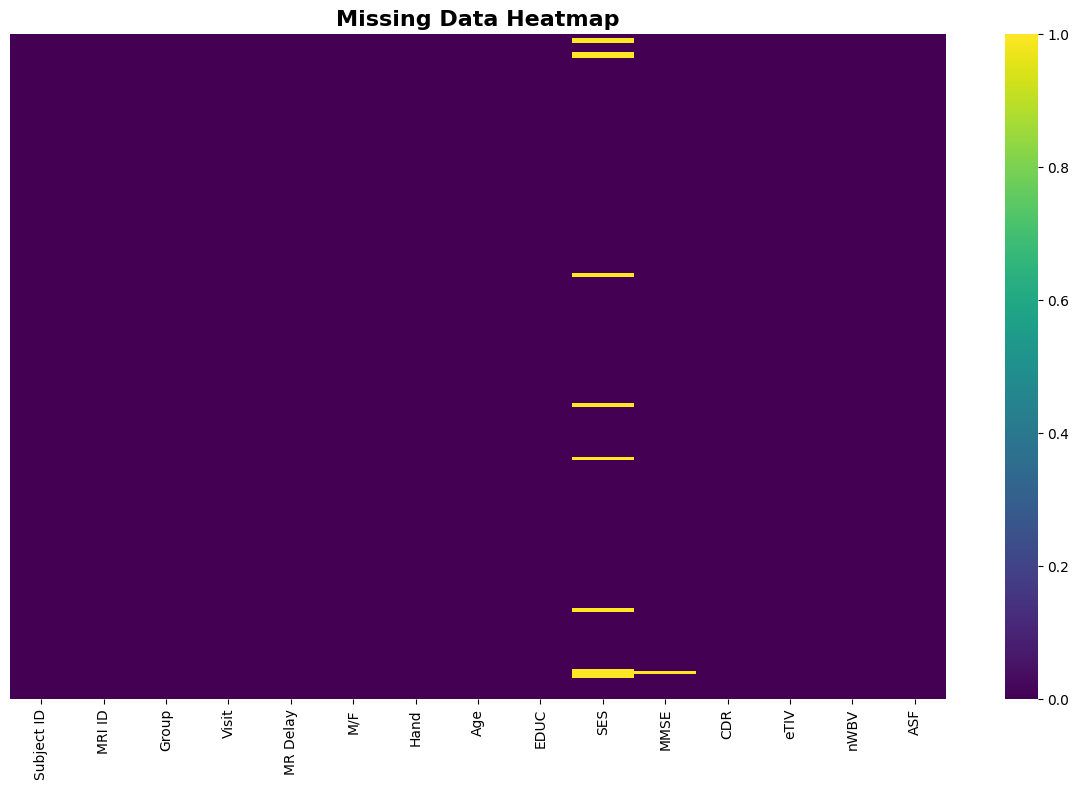

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Target Distribution', 'Target Percentage'),
    specs=[[{'type': 'bar'}, {'type': 'pie'}]]
)

target_counts = df[target_col].value_counts()
fig.add_trace(
    go.Bar(x=target_counts.index, y=target_counts.values,
           marker_color=['#FF6B6B', '#4ECDC4']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=target_counts.index, values=target_counts.values,
           marker_colors=['#FF6B6B', '#4ECDC4']),
    row=1, col=2
)

fig.update_layout(
    title_text="Target Variable Analysis",
    showlegend=False,
    height=400
)
fig.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='RdBu_r',
    aspect="auto"
)

# ==== ADD NUMERALS (ANNOTATIONS) ====
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=str(round(correlation_matrix.iloc[i, j], 2)),
            showarrow=False,
            font=dict(size=10, color="black")
        )

# Layout
fig.update_layout(
    title="Feature Correlation Heatmap",
    height=600,
    width=800
)

fig.show()


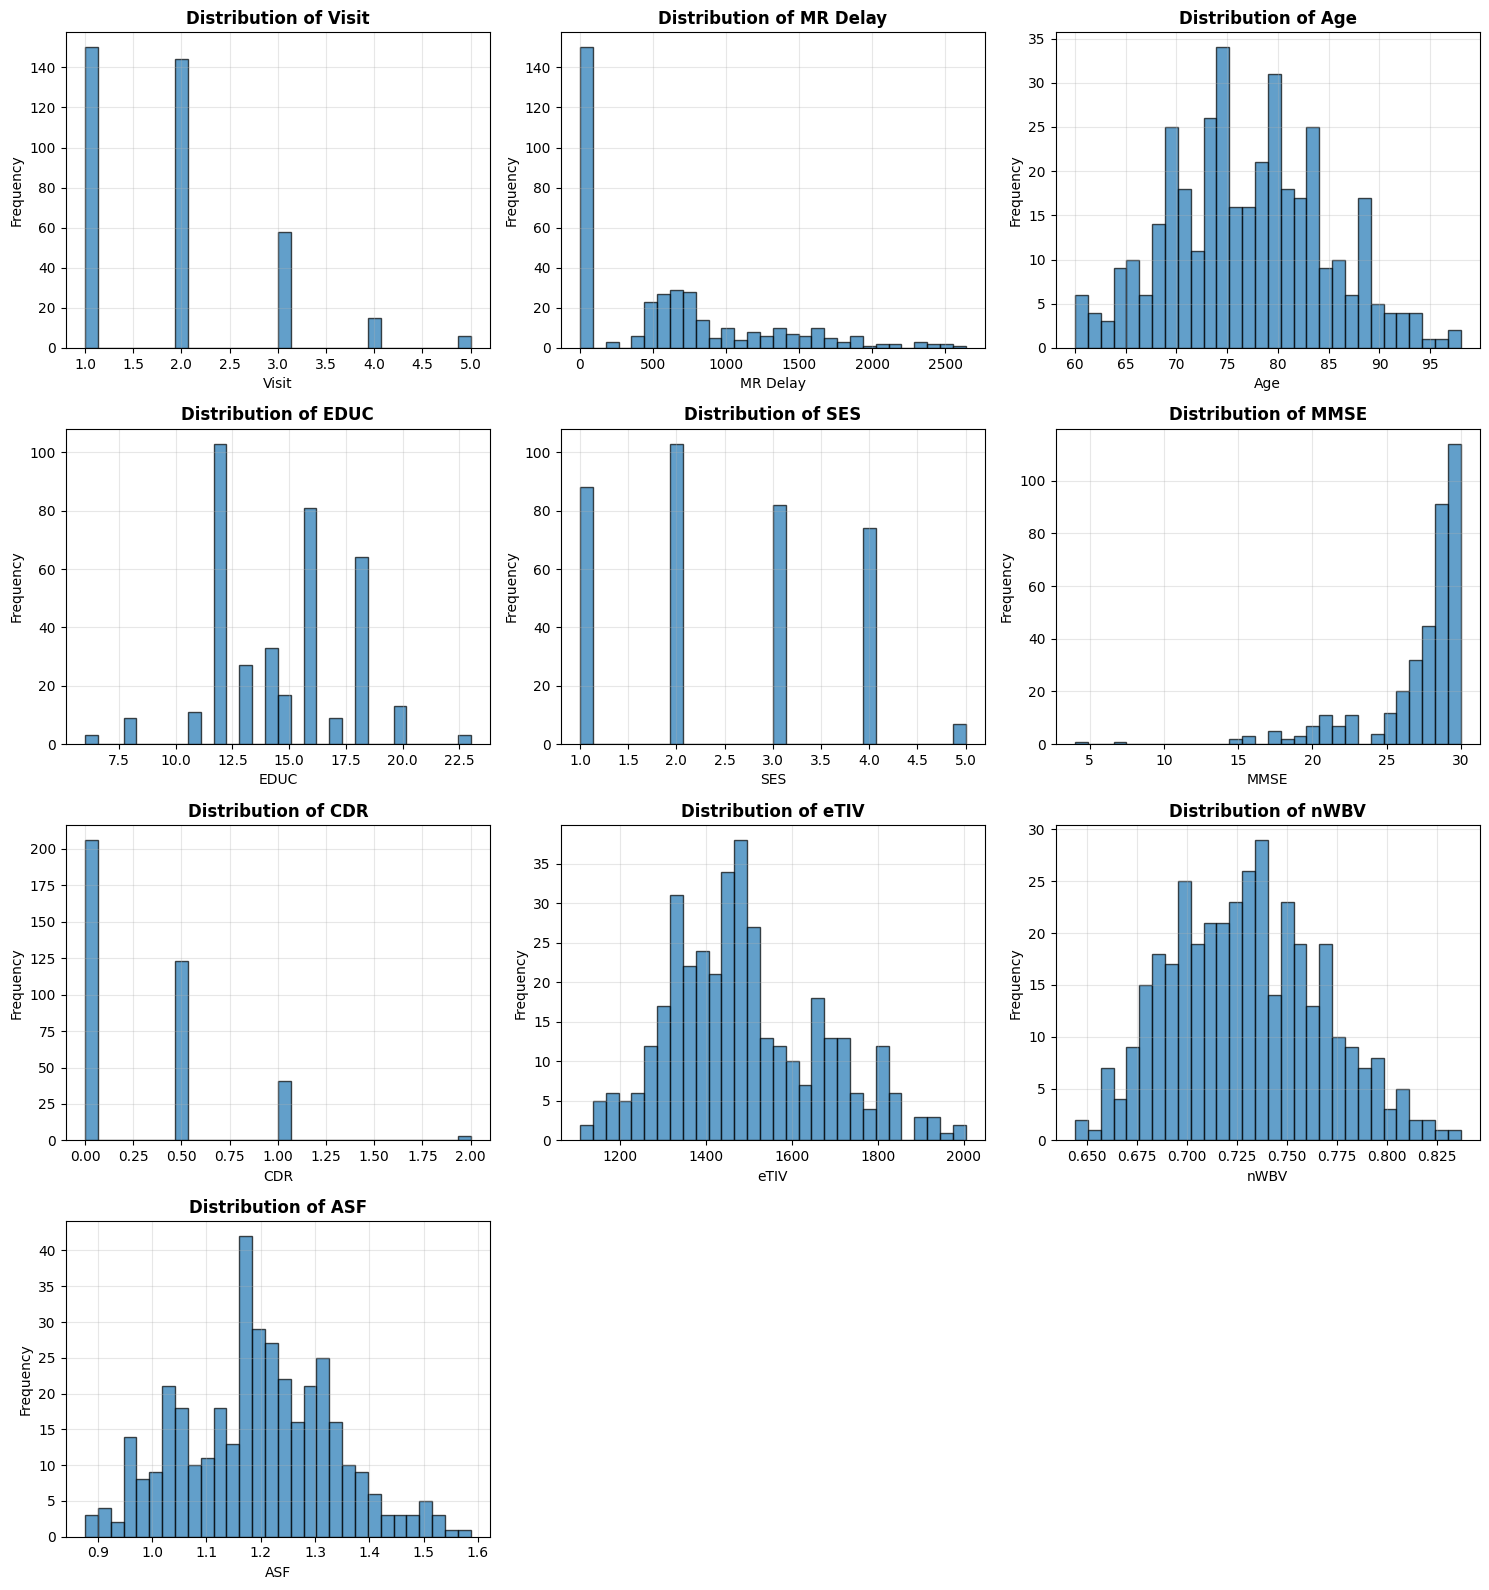

In [ ]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

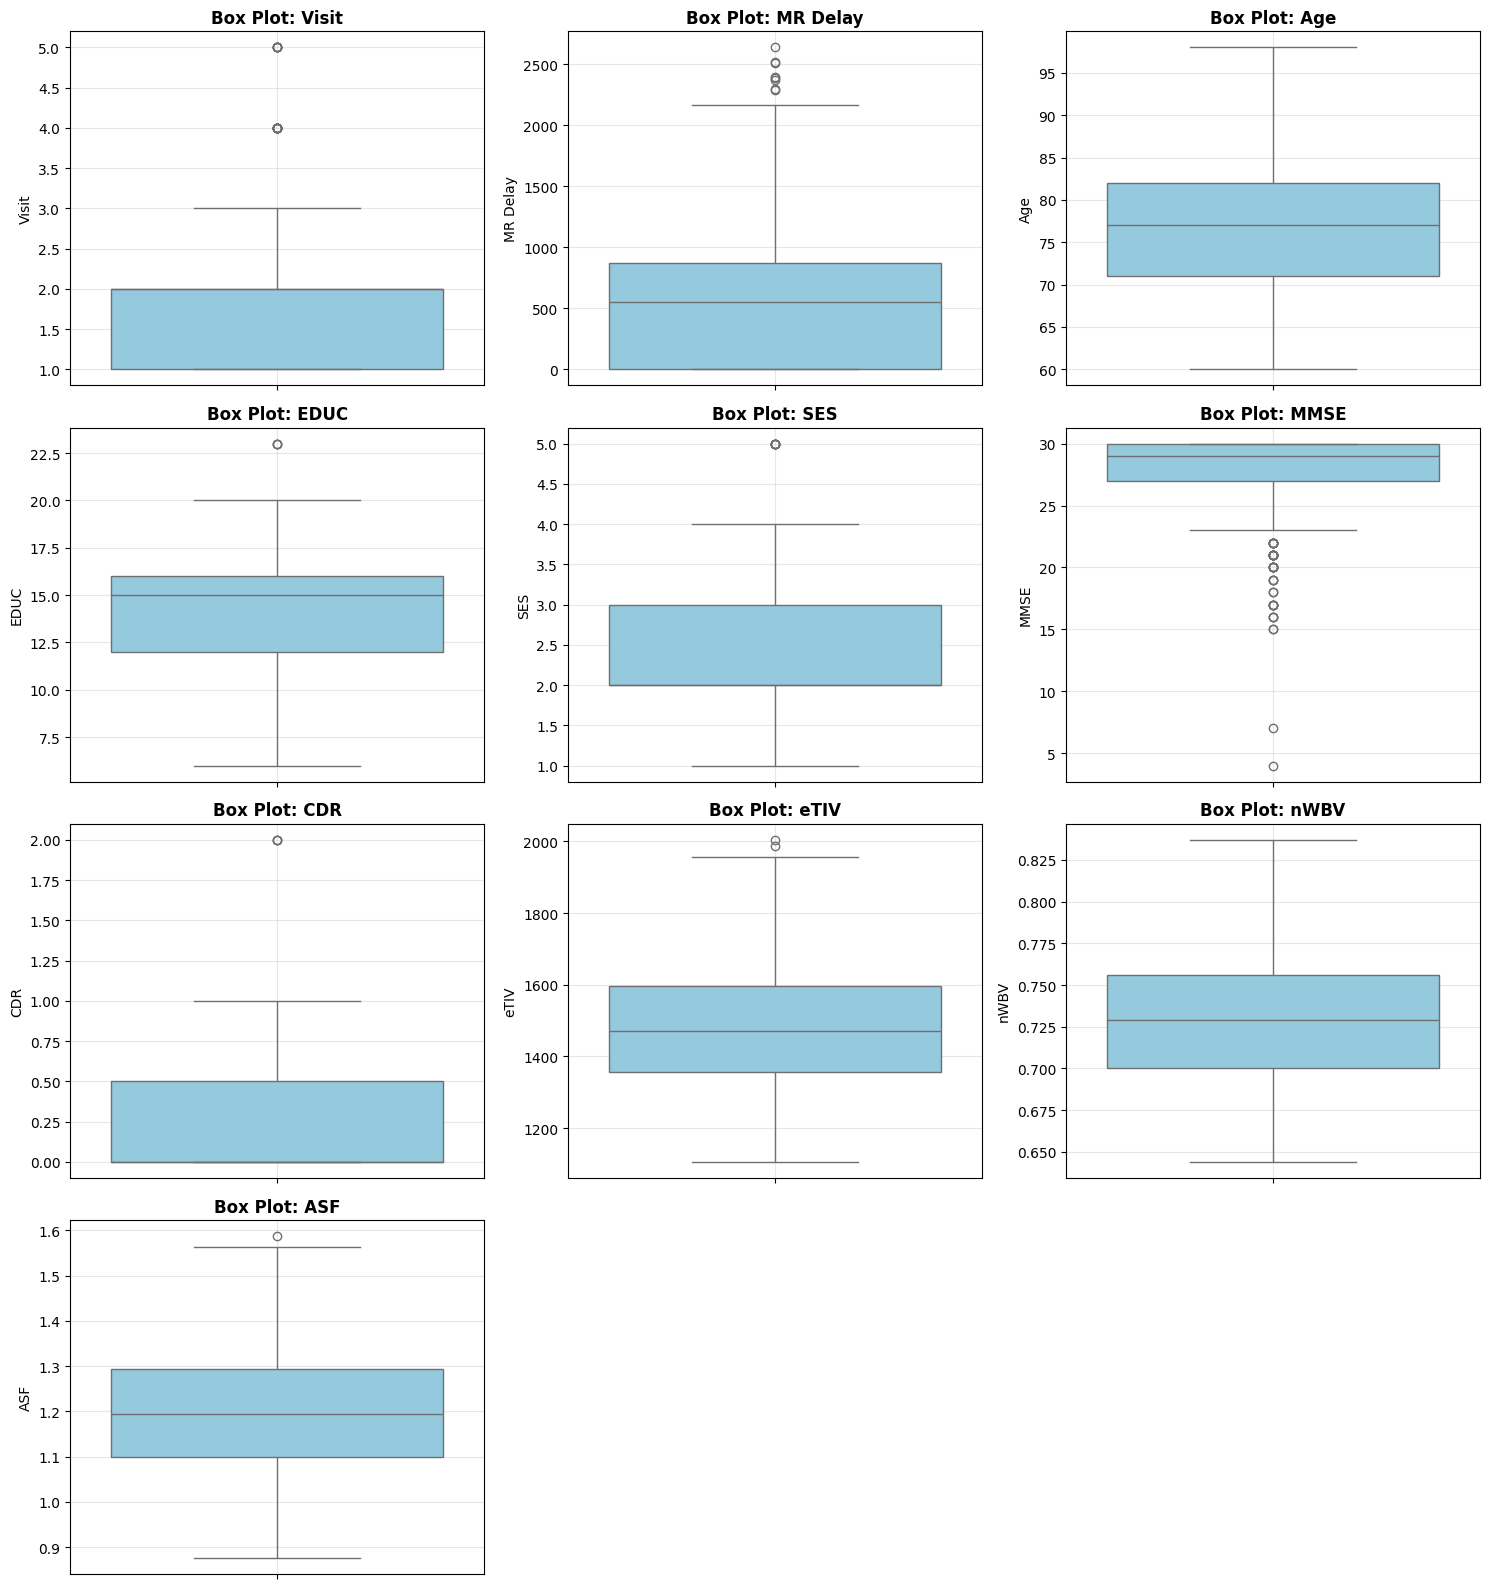

In [ ]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    sns.boxplot(data=df, y=feature, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Box Plot: {feature}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for feature in numeric_features[:6]:  # Top 6 features
    fig = px.box(df, x=target_col, y=feature, color=target_col,
                 title=f'{feature} Distribution by {target_col}',
                 color_discrete_map={0: '#4ECDC4', 1: '#FF6B6B'})
    fig.show()

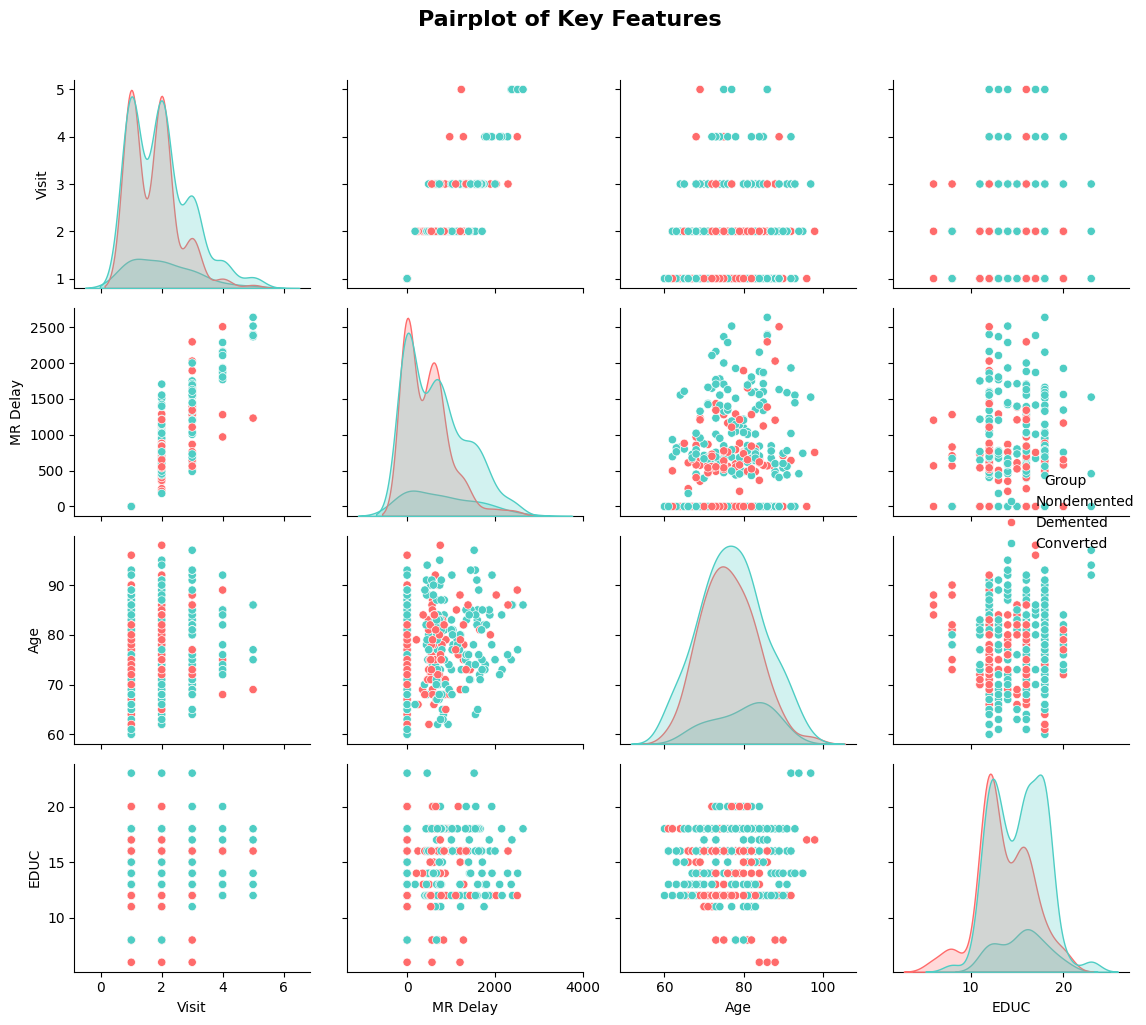

In [ ]:
if len(numeric_features) > 4:
    key_features = numeric_features[:4] + [target_col]
    sns.pairplot(df[key_features], hue=target_col, palette=['#4ECDC4', '#FF6B6B'])
    plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("DATA PREPROCESSING PIPELINE")
print("="*80)

# Create a copy for processing
df_processed = df.copy()

# ============================================================================
# STEP 1: DATA CLEANING
# ============================================================================
print("\n1. Data Cleaning...")
print(f"   Initial shape: {df_processed.shape}")

# Remove duplicates
duplicates = df_processed.duplicated().sum()
if duplicates > 0:
    print(f"   Removing {duplicates} duplicates...")
    df_processed = df_processed.drop_duplicates()

# ============================================================================
# STEP 2: MISSING VALUE HANDLING
# ============================================================================
print("\n2. Missing Value Handling...")
missing_before = df_processed.isnull().sum().sum()

for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        if df_processed[col].dtype in ['int64', 'float64']:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
        else:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print(f"✅ Missing values: {missing_before} → {df_processed.isnull().sum().sum()}")

# ============================================================================
# STEP 3: FEATURE PREPARATION
# ============================================================================
print("\n3. Feature Preparation...")

X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

# Encode target
le_target = None
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print(f"   Target encoded: {le_target.classes_}")

# Encode categorical features
label_encoders = {}
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

print(f"   Features: {X.shape[1]}, Samples: {X.shape[0]}")

# ============================================================================
# STEP 4: TARGET ANALYSIS
# ============================================================================
print("\n4. Target Analysis...")

unique_classes = np.unique(y)
n_classes = len(unique_classes)
is_binary = n_classes == 2
class_counts = np.bincount(y)

print(f"   Type: {'Binary' if is_binary else 'Multi-class'}")
print(f"   Classes: {n_classes}")
for i, count in enumerate(class_counts):
    print(f"      Class {i}: {count} ({count/len(y)*100:.1f}%)")

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"   Imbalance ratio: {imbalance_ratio:.2f}:1")

# ============================================================================
# STEP 5: TRAIN-TEST SPLIT
# ============================================================================
print("\n5. Train-Test Split...")

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print(f"   Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

# ============================================================================
# STEP 6: FEATURE SCALING
# ============================================================================
print("\n6. Feature Scaling...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ StandardScaler applied")


DATA PREPROCESSING PIPELINE

1. Data Cleaning...
   Initial shape: (373, 15)

2. Missing Value Handling...
✅ Missing values: 21 → 0

3. Feature Preparation...
   Target encoded: ['Converted' 'Demented' 'Nondemented']
   Features: 14, Samples: 373

4. Target Analysis...
   Type: Multi-class
   Classes: 3
      Class 0: 37 (9.9%)
      Class 1: 146 (39.1%)
      Class 2: 190 (50.9%)
   Imbalance ratio: 5.14:1

5. Train-Test Split...
   Train: 298 | Test: 75

6. Feature Scaling...
✅ StandardScaler applied


In [ ]:
# ============================================================================
# MODEL TRAINING WITH OPTIMIZED PARAMETERS
# ============================================================================
from sklearn.ensemble import ExtraTreesClassifier

print("\n" + "="*80)
print("MODEL TRAINING WITH TUNED HYPERPARAMETERS")
print("="*80)

# Calculate class weights for imbalanced data
if is_binary and imbalance_ratio > 2:
    class_weight = 'balanced'
    scale_pos_weight = class_counts[0] / class_counts[1]
else:
    class_weight = None
    scale_pos_weight = 1

# Define models with carefully tuned parameters
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=2000,
        C=1.0,
        class_weight=class_weight,
        solver='lbfgs'
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        class_weight=class_weight,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42,
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=2,
        subsample=0.8
    ),
    'XGBoost': XGBClassifier(
        random_state=42,
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        n_jobs=-1
    ),
    'LightGBM': LGBMClassifier(
        random_state=42,
        n_estimators=200,
        learning_rate=0.1,
        max_depth=10,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight=class_weight,
        verbose=-1,
        n_jobs=-1
    ),
    'CatBoost': CatBoostClassifier(
        random_state=42,
        iterations=200,
        learning_rate=0.1,
        depth=6,
        l2_leaf_reg=3,
        auto_class_weights='Balanced' if is_binary and imbalance_ratio > 2 else None,
        verbose=False
    ),
    'SVM': SVC(
        probability=True,
        random_state=42,
        C=1.0,
        kernel='rbf',
        gamma='scale',
        class_weight=class_weight
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='minkowski',
        n_jobs=-1
    ),
    'Extra Trees': ExtraTreesClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight=class_weight,
        n_jobs=-1
    ),
    'AdaBoost': AdaBoostClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=1.0
    )
}

results = []
best_models = {}

print("\nTraining models with optimized parameters...\n")

for name, model in models.items():
    print(f"Training {name}...")

    try:
        # Train
        model.fit(X_train_scaled, y_train)
        best_models[name] = model

        # Predictions
        y_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)

        # Probabilities
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)
            if is_binary:
                y_pred_proba_pos = y_pred_proba[:, 1]
            else:
                y_pred_proba_pos = y_pred_proba
        else:
            y_pred_proba_pos = None

        # Calculate metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_pred)

        avg_method = 'binary' if is_binary else 'weighted'
        precision = precision_score(y_test, y_pred, average=avg_method, zero_division=0)
        recall = recall_score(y_test, y_pred, average=avg_method, zero_division=0)
        f1 = f1_score(y_test, y_pred, average=avg_method, zero_division=0)

        # ROC-AUC
        try:
            if y_pred_proba_pos is not None:
                if is_binary:
                    roc_auc = roc_auc_score(y_test, y_pred_proba_pos)
                else:
                    roc_auc = roc_auc_score(y_test, y_pred_proba_pos,
                                           multi_class='ovr', average='weighted')
            else:
                roc_auc = np.nan
        except:
            roc_auc = np.nan

        # Cross-validation
        try:
            cv_scores = cross_val_score(
                model, X_train_scaled, y_train,
                cv=min(5, len(np.unique(y_train))),
                scoring='accuracy',
                n_jobs=-1
            )
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
        except:
            cv_mean = np.nan
            cv_std = np.nan

        # Binary metrics
        if is_binary:
            cm = confusion_matrix(y_test, y_pred)
            if cm.shape == (2, 2):
                tn, fp, fn, tp = cm.ravel()
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
                sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            else:
                specificity = np.nan
                sensitivity = np.nan
        else:
            specificity = np.nan
            sensitivity = np.nan

        overfit_gap = train_acc - test_acc

        results.append({
            'Model': name,
            'Test_Acc': test_acc,
            'Train_Acc': train_acc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'CV_Mean': cv_mean,
            'CV_Std': cv_std,
            'Overfit_Gap': overfit_gap
        })

        print(f"   ✅ Acc: {test_acc:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f} | CV: {cv_mean:.4f}")

    except Exception as e:
        print(f"   ❌ Error: {str(e)}")
        continue

# ============================================================================
# RESULTS ANALYSIS
# ============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(results_df[['Model', 'Test_Acc', 'Precision', 'Recall', 'F1-Score',
                   'ROC-AUC', 'CV_Mean', 'CV_Std', 'Overfit_Gap']].to_string(index=False))

# Model recommendations
print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)
print(f"Best Accuracy:  {results_df.iloc[results_df['Test_Acc'].idxmax()]['Model']} ({results_df['Test_Acc'].max():.4f})")
print(f"Best Precision: {results_df.iloc[results_df['Precision'].idxmax()]['Model']} ({results_df['Precision'].max():.4f})")
print(f"Best Recall:    {results_df.iloc[results_df['Recall'].idxmax()]['Model']} ({results_df['Recall'].max():.4f})")
print(f"Best F1-Score:  {results_df.iloc[results_df['F1-Score'].idxmax()]['Model']} ({results_df['F1-Score'].max():.4f})")
if not results_df['ROC-AUC'].isna().all():
    print(f"Best ROC-AUC:   {results_df.iloc[results_df['ROC-AUC'].idxmax()]['Model']} ({results_df['ROC-AUC'].max():.4f})")

print("\n" + "="*80)
print("RECOMMENDED MODEL")
print("="*80)
best = results_df.iloc[0]
print(f"🏆 {best['Model']}")
print(f"   Test Accuracy: {best['Test_Acc']:.4f}")
print(f"   F1-Score: {best['F1-Score']:.4f}")
print(f"   CV Accuracy: {best['CV_Mean']:.4f} (±{best['CV_Std']:.4f})")
print(f"   Overfitting: {'⚠️ High' if best['Overfit_Gap'] > 0.1 else '✅ Low'} ({best['Overfit_Gap']:.4f})")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

# Performance comparison
fig = go.Figure()
metrics = ['Test_Acc', 'Precision', 'Recall', 'F1-Score']
if not results_df['ROC-AUC'].isna().all():
    metrics.append('ROC-AUC')

for metric in metrics:
    fig.add_trace(go.Bar(
        name=metric,
        x=results_df['Model'],
        y=results_df[metric],
        text=results_df[metric].round(3),
        textposition='auto'
    ))

fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis_title='Score',
    barmode='group',
    height=500,
    xaxis={'tickangle': -45}
)
fig.show()

# Train vs Test
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Train Accuracy',
    x=results_df['Model'],
    y=results_df['Train_Acc'],
    marker_color='lightgreen'
))
fig.add_trace(go.Bar(
    name='Test Accuracy',
    x=results_df['Model'],
    y=results_df['Test_Acc'],
    marker_color='lightcoral'
))
fig.update_layout(
    title='Train vs Test Accuracy',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    barmode='group',
    height=500,
    xaxis={'tickangle': -45}
)
fig.show()

# CV scores
fig = go.Figure()
fig.add_trace(go.Bar(
    name='CV Accuracy',
    x=results_df['Model'],
    y=results_df['CV_Mean'],
    error_y=dict(type='data', array=results_df['CV_Std']),
    marker_color='skyblue'
))
fig.update_layout(
    title='Cross-Validation Accuracy',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    height=500,
    xaxis={'tickangle': -45}
)
fig.show()

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"\n✅ Results saved to 'model_comparison_results.csv'")
print("="*80)


MODEL TRAINING WITH TUNED HYPERPARAMETERS

Training models with optimized parameters...

Training Logistic Regression...
   ✅ Acc: 0.9067 | F1: 0.8875 | ROC-AUC: 0.9608 | CV: 0.9161
Training Random Forest...
   ✅ Acc: 0.9067 | F1: 0.8875 | ROC-AUC: 0.9690 | CV: 0.9027
Training Gradient Boosting...
   ✅ Acc: 0.9200 | F1: 0.9080 | ROC-AUC: 0.9893 | CV: 0.8926
Training XGBoost...
   ✅ Acc: 0.8933 | F1: 0.8773 | ROC-AUC: 0.9699 | CV: 0.8824
Training LightGBM...
   ✅ Acc: 0.8933 | F1: 0.8773 | ROC-AUC: 0.9789 | CV: 0.8857
Training CatBoost...
   ✅ Acc: 0.9067 | F1: 0.8875 | ROC-AUC: 0.9806 | CV: 0.8892
Training SVM...
   ✅ Acc: 0.9067 | F1: 0.8729 | ROC-AUC: 0.9505 | CV: 0.8993
Training KNN...
   ✅ Acc: 0.8267 | F1: 0.7863 | ROC-AUC: 0.9343 | CV: 0.7986
Training Extra Trees...
   ✅ Acc: 0.9200 | F1: 0.8982 | ROC-AUC: 0.9843 | CV: 0.9161
Training AdaBoost...
   ✅ Acc: 0.8933 | F1: 0.8430 | ROC-AUC: 0.9192 | CV: 0.8960

MODEL COMPARISON RESULTS
              Model  Test_Acc  Precision   Reca


✅ Results saved to 'model_comparison_results.csv'


In [ ]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {results_df.iloc[0]['Test_Acc']:.4f}")
print(f"   F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f}")

# Retrain best model
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Check if the model has predict_proba and if y is multi-class
if hasattr(best_model, 'predict_proba') and len(np.unique(y_test)) > 2:
    # For multi-class, predict_proba returns probabilities for all classes
    # We need to handle this based on how ROC-AUC was calculated (e.g., 'ovr')
    # Here we default to taking the first class probability if not specified in metrics
    y_pred_proba = best_model.predict_proba(X_test_scaled)
elif hasattr(best_model, 'predict_proba'):
    # For binary classification, take the probability of the positive class
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_proba = None

# Classification Report
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


🏆 Best Model: Gradient Boosting
   Accuracy: 0.9200
   F1-Score: 0.9080
   ROC-AUC: 0.9893

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.97      0.97      0.97        29
           2       0.90      1.00      0.95        38

    accuracy                           0.92        75
   macro avg       0.87      0.78      0.81        75
weighted avg       0.91      0.92      0.91        75



In [ ]:
fig = px.imshow(cm,
                labels=dict(x="Predicted", y="Actual", color="Count"),
                x=['Converted', 'Demented', 'Nondemented'],
                y=['Converted', 'Demented', 'Nondemented'],
                text_auto=True,
                color_continuous_scale='Blues')
fig.update_layout(
    title=f'Confusion Matrix - {best_model_name}',
    height=400,
    width=500
)
fig.show()

In [ ]:
fig = go.Figure()

n_classes = len(np.unique(y_test))
class_labels = le_target.classes_ if le_target is not None else [str(i) for i in range(n_classes)]

for i in range(n_classes):
    y_test_bin = (y_test == i).astype(int)
    y_score = y_pred_proba[:, i] if y_pred_proba.ndim > 1 else y_pred_proba # Handle both 1D and 2D y_pred_proba

    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc_class = roc_auc_score(y_test_bin, y_score)

    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (Class {class_labels[i]} AUC = {roc_auc_class:.3f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier',
                         line=dict(color='navy', width=2, dash='dash')))

fig.update_layout(
    title=f'ROC Curve - {best_model_name} (One-vs-Rest)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    height=500,
    width=700
)
fig.show()

In [ ]:
fig = go.Figure()

n_classes = len(np.unique(y_test))
class_labels = le_target.classes_ if le_target is not None else [str(i) for i in range(n_classes)]

for i in range(n_classes):
    y_test_bin = (y_test == i).astype(int)
    y_score = y_pred_proba[:, i] if y_pred_proba.ndim > 1 else y_pred_proba # Ensure we get probabilities for the current class

    precision_curve, recall_curve, _ = precision_recall_curve(y_test_bin, y_score)
    avg_precision = average_precision_score(y_test_bin, y_score)

    fig.add_trace(go.Scatter(x=recall_curve, y=precision_curve, mode='lines',
                             name=f'Precision-Recall curve (Class {class_labels[i]} AP = {avg_precision:.3f})'))

fig.update_layout(
    title=f'Precision-Recall Curve - {best_model_name} (One-vs-Rest)',
    xaxis_title='Recall',
    yaxis_title='Precision',
    height=500,
    width=700
)
fig.show()

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    fig = px.bar(feature_importance.head(15), x='Importance', y='Feature',
                 orientation='h', title=f'Top 15 Feature Importances - {best_model_name}')
    fig.update_layout(height=500)
    fig.show()

# Save the model and scaler
import pickle

# Save model
with open('best_dementia_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

print("\n✅ Model, scaler, and feature names saved successfully!")



✅ Model, scaler, and feature names saved successfully!


In [ ]:
import gradio as gr
import pickle
import pandas as pd
import numpy as np
import os

print("\n" + "="*80)
print("CREATING INTERACTIVE WEBSITE")
print("="*80)

# Load saved model and scaler
with open('best_dementia_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

# Try to load dataset 'df' if available in workspace (used to build categorical mappings)
df = None
for candidate in ['df.pkl', 'dataset.pkl', 'data.pkl', 'data.csv']:
    if os.path.exists(candidate):
        try:
            if candidate.endswith('.csv'):
                df = pd.read_csv(candidate)
            else:
                with open(candidate, 'rb') as f:
                    df = pickle.load(f)
            print(f"Loaded dataset from {candidate} for categorical mappings.")
            break
        except Exception as e:
            print(f"Could not load {candidate}: {e}")
            df = None

# Load or build categorical mappings (feature -> {category_string: int})
categorical_mappings = {}
if os.path.exists('categorical_mappings.pkl'):
    try:
        with open('categorical_mappings.pkl', 'rb') as f:
            categorical_mappings = pickle.load(f)
        print("Loaded existing categorical_mappings.pkl")
    except Exception as e:
        print("Failed to load categorical_mappings.pkl:", e)
        categorical_mappings = {}

# If mappings absent and df available, build them from df (stringifying values)
if (not categorical_mappings) and (df is not None):
    try:
        for feat in feature_names:
            # Make sure column exists in df
            if feat in df.columns:
                vals = df[feat].astype(str).fillna("").unique().tolist()
                mapping = {v: idx for idx, v in enumerate(vals)}
                categorical_mappings[feat] = mapping
        # persist mappings
        with open('categorical_mappings.pkl', 'wb') as f:
            pickle.dump(categorical_mappings, f)
        print("Built and saved categorical_mappings.pkl from dataframe.")
    except Exception as e:
        print("Could not build mappings from df:", e)
        categorical_mappings = {}

# User database (in production, use proper database)
USER_DB = {
    "demo": "demo123",
    "admin": "admin123"
}

# Session state
session_state = {"logged_in": False, "username": ""}

# Login function
def login(username, password):
    if username in USER_DB and USER_DB[username] == password:
        session_state["logged_in"] = True
        session_state["username"] = username
        # Return updates for login_output, login_tab, and prediction_tab
        return f"✅ Welcome, {username}! You can now use the prediction tool.", gr.update(visible=False), gr.update(visible=True)
    else:
        # Return updates for login_output, login_tab, and prediction_tab
        return "❌ Invalid credentials. Try username: 'demo', password: 'demo123'", gr.update(visible=True), gr.update(visible=False)

# Logout function
def logout():
    session_state["logged_in"] = False
    session_state["username"] = ""
    # Return updates for login_output, login_tab, and prediction_tab
    return "Logged out successfully.", gr.update(visible=True), gr.update(visible=False)

# Helper to encode a single raw feature string into numeric
def encode_feature(feat_name, raw_val):
    val = "" if raw_val is None else str(raw_val).strip()

    # empty -> treat as 0.0
    if val == "":
        return 0.0

    # try numeric
    try:
        return float(val)
    except Exception:
        pass

    # categorical mapping if available
    if feat_name in categorical_mappings:
        mapping = categorical_mappings[feat_name]
        if val in mapping:
            return float(mapping[val])
        else:
            # unseen category: add to mapping and persist
            idx = max(mapping.values()) + 1 if mapping else 0
            mapping[val] = idx
            categorical_mappings[feat_name] = mapping
            try:
                with open('categorical_mappings.pkl', 'wb') as f:
                    pickle.dump(categorical_mappings, f)
            except Exception:
                pass
            return float(idx)

    # fallback deterministic hash encoding (repeatable across runs on same Python process)
    return float(abs(hash((feat_name, val))) % 10000)  # keep within reasonable range

# Prediction function — now accepts alphanumeric entries for every feature
def predict_dementia(*features):
    try:
        # features is a tuple of strings (one per feature_name)
        if len(features) != len(feature_names):
            return "<div style='color: red;'>Error: number of inputs does not match model features.</div>"

        processed = []
        for fname, raw in zip(feature_names, features):
            num = encode_feature(fname, raw)
            processed.append(num)

        # Convert to numpy float array
        input_data = np.array([processed], dtype=float)

        # Scale features (assumes scaler expects same number/order of features)
        input_scaled = loaded_scaler.transform(input_data)

        # Make prediction
        prediction = loaded_model.predict(input_scaled)[0]

        # Get probabilities (handle binary & multiclass)
        prob = None
        try:
            probs = loaded_model.predict_proba(input_scaled)[0]
            if probs.ndim == 1:
                # binary or multiclass flatten
                prob = np.max(probs)
            else:
                prob = np.max(probs)
        except Exception:
            # fallback: no proba method
            prob = 1.0

        confidence = float(prob) * 100.0
        result = "Dementia Detected" if int(prediction) == 1 else "No Dementia"
        risk_level = "High Risk" if confidence > 80 else "Moderate Risk" if confidence > 60 else "Low Risk"

        result_html = f"""
        <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    padding: 30px; border-radius: 15px; color: white; text-align: center;'>
            <h2 style='margin: 0; font-size: 2.5em;'>🧠 Prediction Result</h2>
            <div style='background: rgba(255,255,255,0.1); padding: 20px; margin: 20px 0; border-radius: 10px;'>
                <h3 style='font-size: 2em; margin: 10px 0;'>{result}</h3>
                <p style='font-size: 1.3em; margin: 10px 0;'>Confidence: {confidence:.2f}%</p>
                <p style='font-size: 1.2em; margin: 10px 0;'>Risk Level: {risk_level}</p>
            </div>
            <div style='background: rgba(255,255,255,0.2); padding: 15px; border-radius: 10px; margin-top: 20px;'>
                <p style='font-size: 0.95em; line-height: 1.6;'>
                    ⚠️ <strong>Important Disclaimer:</strong><br>
                    This is an AI-based prediction tool for educational purposes only.
                    It should NOT be used as a substitute for professional medical diagnosis.
                    Please consult qualified healthcare professionals for proper evaluation and diagnosis.
                </p>
            </div>
        </div>
        """
        return result_html

    except Exception as e:
        return f"<div style='color: red;'>Error: {str(e)}</div>"

# Create Gradio Interface
with gr.Blocks(theme=gr.themes.Soft(), css="""
    .gradio-container {
        font-family: 'Arial', sans-serif;
    }
    .main-title {
        text-align: center;
        color: #667eea;
        font-size: 3em;
        margin-bottom: 10px;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.1);
    }
    .subtitle {
        text-align: center;
        color: #666;
        font-size: 1.2em;
        margin-bottom: 30px;
    }
""") as demo:

    gr.Markdown("<h1 class='main-title'>🧠 Dementia Prediction System</h1>")
    gr.Markdown("<p class='subtitle'>Advanced AI-Powered Early Detection Tool</p>")

    with gr.Tabs():
        # Tab 1: Login
        with gr.Tab("🔐 Login") as login_tab: # Assign a variable name to the login tab
            with gr.Column():
                gr.Markdown("### Please login to access the prediction tool")
                username_input = gr.Textbox(label="Username", placeholder="demo")
                password_input = gr.Textbox(label="Password", type="password", placeholder="demo123")
                login_btn = gr.Button("Login", variant="primary")
                login_output = gr.Markdown()

        # Tab 2: Prediction Tool
        with gr.Tab("🔮 Prediction", visible=False) as prediction_tab:
            with gr.Row():
                with gr.Column(scale=2):
                    gr.Markdown("### Enter Patient Information")

                    # Use textboxes for alphanumeric entries
                    inputs = []
                    for feature in feature_names:
                        # empty default value — user can type numeric or text
                        inputs.append(gr.Textbox(label=feature, value=""))

                    predict_btn = gr.Button("🎯 Predict Dementia Risk", variant="primary", size="lg")
                    logout_btn = gr.Button("Logout", variant="secondary")

                with gr.Column(scale=1):
                    prediction_output = gr.HTML()

        # Tab 3: About Dementia
        with gr.Tab("📚 About Dementia"):
            gr.Markdown("...")  # keep your long about text as before or reinsert it

        # Tab 4: Model Information
        with gr.Tab("ℹ️ Model Info"):
            # guard in case results_df or best_model_name not in scope
            try:
                best_model_name = best_model_name
                metrics_html = f"""
                ### Model Information
                - Best Model: {best_model_name}
                """
            except Exception:
                metrics_html = "Model information not available in this runtime."

            gr.Markdown(metrics_html)

    # Connect login functionality
    login_btn.click(
        fn=login,
        inputs=[username_input, password_input],
        outputs=[login_output, login_tab, prediction_tab] # Pass actual components
    )

    # Connect logout functionality
    logout_btn.click(
        fn=logout,
        outputs=[login_output, login_tab, prediction_tab] # Pass actual components
    )

    # Connect prediction functionality
    predict_btn.click(
        fn=predict_dementia,
        inputs=inputs,
        outputs=prediction_output
    )

# Launch the app
print("\n✅ Launching Interactive Website...")
print("="*80)
demo.launch(share=True, debug=True)


CREATING INTERACTIVE WEBSITE

✅ Launching Interactive Website...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://579e31dd4bfd031a7a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


KeyboardInterrupt: 